### **Equipo 8**

- Diego Villegas Juárez     197902
- Yedam Axel Fortiz Vargas  119523
- Yusuri Arciga Reyes       190063

### **Proyecto 1**
### Llamado Oportuno

EDA/GEDA de Accidentes viales en la CDMX reportados por C5

La información que contienen nuestras variables son las siguientes:

folio,
fecha de creación del reporte,
hora de creación del reporte,
día de la semana de creación del reporte,
fecha de cierre de reporte,
hora de cierre de reporte,
motivo del incidente dependiendo del tipo de emergencia,
alcaldía donde sucedió el incidente,
latitud y longitud del incidente,
código de cierre del incidente reportado,
clasificación del incidente,
origen del incidente por tipo,
alcaldía en que se dio resolución al incidente o emergencia

En la base de datos tenemos 1,383,138 registros y 18 variables: 

- folio
- fecha_creacion
- hora_creacion
- dia_semana
- codigo_cierre
- fecha_cierre
- año_cierre
- mes_cierre
- hora_cierre
- delegacion_inicio
- incidente_c4
- latitud
- longitud
- clas_con_f_alarma
- tipo_entrada
- delegacion_cierre
- geopoint
- mes
  
Contamos con información del año 2014 al 2020
   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as mtick
import sys
sys.path.append('./../')
import src

##Leer archivo csv
from src.pipelines import ingestion

#Funciones eda
from src.pipelines import eda

In [2]:
c5 = ingestion.ingest_file('../data/incidentes-viales-c5.csv')

In [3]:
c5.shape

(1383138, 18)

In [4]:
c5.dtypes

folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object

In [5]:
c5.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes'],
      dtype='object')

In [6]:
tabla_nunicos = pd.DataFrame(c5.nunique())
tabla_nunicos.columns = ['número de elementos únicos']
tabla_nunicos['número de elementos únicos'] = tabla_nunicos['número de elementos únicos'].map('{:,}'.format)
tabla_nunicos

,número de elementos únicos
folio,"1,383,138"
fecha_creacion,"2,637"
hora_creacion,"105,887"
dia_semana,7
codigo_cierre,5
fecha_cierre,"2,621"
año_cierre,7
mes_cierre,12
hora_cierre,"106,827"
delegacion_inicio,16


In [7]:
c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1


In [8]:
c5.dia_semana.unique()

array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [9]:
c5.codigo_cierre.unique()

array(['(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada',
       '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad',
       '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente',
       '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente',
       '(I) El incidente reportado es afirmativo y se añade información adicional al evento'],
      dtype=object)

In [10]:
c5.año_cierre.unique()

array([2016, 2017, 2018, 2019, 2015, 2014, 2020])

In [11]:
c5.mes_cierre.unique()

array(['Enero', 'Febrero', 'Marzo', 'Septiembre', 'Octubre', 'Mayo',
       'Junio', 'Abril', 'Agosto', 'Diciembre', 'Julio', 'Noviembre'],
      dtype=object)

In [12]:
c5.delegacion_inicio.unique()

array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
       'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
       'TLAHUAC', 'CUAUHTEMOC', 'COYOACAN', 'IZTAPALAPA', 'BENITO JUAREZ',
       'AZCAPOTZALCO', 'IZTACALCO', 'MILPA ALTA', 'ALVARO OBREGON',
       'XOCHIMILCO', nan], dtype=object)

In [13]:
c5.incidente_c4.unique()

array(['accidente-choque sin lesionados',
       'accidente-choque con lesionados',
       'lesionado-accidente automovilístico', 'accidente-volcadura',
       'lesionado-atropellado', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'accidente-motociclista', 'accidente-vehiculo desbarrancado',
       'accidente-choque con prensados', 'accidente-vehiculo atrapado',
       'accidente-ciclista', 'accidente-monopatín',
       'sismo-choque con lesionados',
       'accidente-vehículo atrapado-varado',
       'detención ciudadana-atropellado', 'accidente-ferroviario',
       'detención ciudadana-accidente automovilístico',
       'sismo-choque sin lesionados', 'sismo-persona atropellada',
       'Detención ciudadana-accidente automovilístico',
       'sismo-choque con prensados',
       'mi ciudad-calle-incidente de tránsito',
       'mi ciudad-taxi-incidente de tránsito'], dtype=object)

In [14]:
c5.clas_con_f_alarma.unique()

array(['EMERGENCIA', 'URGENCIAS MEDICAS', 'FALSA ALARMA', 'DELITO'],
      dtype=object)

In [15]:
c5.tipo_entrada.unique()

array(['BOTÓN DE AUXILIO', 'LLAMADA DEL 066', 'RADIO', 'CÁMARA', 'REDES',
       'LLAMADA DEL 911', 'LLAMADA APP911', 'ZELLO', 'APLICATIVOS'],
      dtype=object)

In [16]:
c5.delegacion_cierre.unique()

array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
       'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
       'TLAHUAC', 'ALVARO OBREGON', 'CUAUHTEMOC', 'COYOACAN',
       'IZTAPALAPA', 'BENITO JUAREZ', 'AZCAPOTZALCO', 'IZTACALCO',
       'MILPA ALTA', 'XOCHIMILCO', nan], dtype=object)

In [17]:
c5.mes.unique()

array([ 1,  2,  3,  9, 10,  5,  6,  4,  8, 12,  7, 11])

Convertir al tipo correcto de variable

In [18]:
#Vamos a separar la información de la variable geopoint y ver si coincide con latitud y longitud
geo = c5.geopoint.str.split(",", n=1, expand = True)
c5["lat_geo"]=geo[1]
c5["long_geo"]=geo[0]
c5['lat_geo'] = c5.latitud.astype('float')
c5['long_geo'] = c5.longitud.astype('float')

In [19]:
#Verificamos el tipo de variable de las nuevas columnas
c5[["lat_geo", "long_geo"]].dtypes

lat_geo     float64
long_geo    float64
dtype: object

In [20]:
#Vemos cuántos registros son iguales en latitud
comparison_array = c5.latitud == c5.lat_geo
w= c5["lat_geo"], c5["latitud"], comparison_array
n=pd.DataFrame(w).transpose()
comparison_array.value_counts()

True     1382695
False        443
dtype: int64

In [21]:
#Los que "no son iguales"
n[n.latitud.isnull()]

,lat_geo,latitud,Unnamed 0
284050,NaN,NaN,0.0
284051,NaN,NaN,0.0
284052,NaN,NaN,0.0
284053,NaN,NaN,0.0
284054,NaN,NaN,0.0
...,...,...,...
714663,NaN,NaN,0.0
714665,NaN,NaN,0.0
714667,NaN,NaN,0.0
714695,NaN,NaN,0.0


In [22]:
n[n.latitud.isnull()].count()

lat_geo        0
latitud        0
Unnamed 0    443
dtype: int64

In [23]:
c5.latitud.count()

1382695

In [24]:
#Vemos cuántos registros son iguales ahora en longitud
comparison_array2 = c5.longitud == c5.long_geo
w2= c5["long_geo"], c5["longitud"], comparison_array2
n2=pd.DataFrame(w2).transpose()
comparison_array2.value_counts()

True     1382703
False        435
dtype: int64

In [25]:
#Los que "no son iguales"
n2[n2.longitud.isnull()]

,long_geo,longitud,Unnamed 0
284050,NaN,NaN,0.0
284051,NaN,NaN,0.0
284052,NaN,NaN,0.0
284053,NaN,NaN,0.0
284054,NaN,NaN,0.0
...,...,...,...
714663,NaN,NaN,0.0
714665,NaN,NaN,0.0
714667,NaN,NaN,0.0
714695,NaN,NaN,0.0


In [26]:
n2[n2.longitud.isnull()].count()

long_geo       0
longitud       0
Unnamed 0    435
dtype: int64

In [27]:
c5.longitud.count()

1382703

Confirmamos que tienen los mismos datos en la variable geopoint y en latitud y longitud

Convertimos cada variable al tipo que definimos

In [28]:
c5['fecha_creacion'] = pd.to_datetime(c5['fecha_creacion'])
c5['hora_creacion'] = pd.to_datetime(c5['hora_creacion'], errors='coerce',format='%H:%M:%S')
c5['dia_semana'] = c5.dia_semana.astype('category')
c5['codigo_cierre'] = c5.codigo_cierre.astype('category')
c5['fecha_cierre'] = pd.to_datetime(c5['fecha_cierre'])
c5['año_cierre'] = c5.año_cierre.astype('category')
c5['mes_cierre'] = c5.mes_cierre.astype('category')
c5['hora_cierre'] = pd.to_datetime(c5['hora_cierre'], errors='coerce',format='%H:%M:%S')
c5['delegacion_inicio'] = c5.delegacion_inicio.astype('category')
c5['clas_con_f_alarma'] = c5.clas_con_f_alarma.astype('category')
c5['tipo_entrada'] = c5.tipo_entrada.astype('category')
c5['delegacion_cierre'] = c5.delegacion_cierre.astype('category')
c5['mes'] = c5.mes.astype('category')

In [29]:
tabla_tipos = pd.DataFrame(c5.dtypes)
tabla_tipos.columns = ['Tipo de dato']
tabla_tipos

,Tipo de dato
folio,object
fecha_creacion,datetime64[ns]
hora_creacion,datetime64[ns]
dia_semana,category
codigo_cierre,category
fecha_cierre,datetime64[ns]
año_cierre,category
mes_cierre,category
hora_cierre,datetime64[ns]
delegacion_inicio,category


In [30]:
tabla_tipos[tabla_tipos['Tipo de dato']==object]

,Tipo de dato
folio,object
incidente_c4,object
geopoint,object


In [31]:
tabla_tipos[tabla_tipos['Tipo de dato']=='category']

,Tipo de dato
dia_semana,category
codigo_cierre,category
año_cierre,category
mes_cierre,category
delegacion_inicio,category
clas_con_f_alarma,category
tipo_entrada,category
delegacion_cierre,category
mes,category


In [32]:
tabla_tipos[tabla_tipos['Tipo de dato']=='datetime64[ns]']

,Tipo de dato
fecha_creacion,datetime64[ns]
hora_creacion,datetime64[ns]
fecha_cierre,datetime64[ns]
hora_cierre,datetime64[ns]


In [33]:
tabla_tipos[tabla_tipos['Tipo de dato']=='float64']

,Tipo de dato
latitud,float64
longitud,float64
lat_geo,float64
long_geo,float64


In [34]:
c5.describe()

,latitud,longitud,lat_geo,long_geo
count,1.382695e+06,1.382703e+06,1.382695e+06,1.382703e+06
mean,1.938391e+01,-9.914359e+01,1.938391e+01,-9.914359e+01
std,2.666382e-01,2.399677e+00,2.666382e-01,2.399677e+00
min,1.909402e+01,-9.917640e+02,1.909402e+01,-9.917640e+02
25%,1.933685e+01,-9.917930e+01,1.933685e+01,-9.917930e+01
50%,1.938408e+01,-9.914023e+01,1.938408e+01,-9.914023e+01
75%,1.943496e+01,-9.909600e+01,1.943496e+01,-9.909600e+01
max,1.953030e+02,-9.894537e+01,1.953030e+02,-9.894537e+01


### 2.1 Data Profiling

In [35]:
#variables numéricas
nc5 = c5.select_dtypes(include='number').columns.values
print('Son ' + str(nc5.shape[0]) + ' variables numericas' , nc5)

Son 4 variables numericas ['latitud' 'longitud' 'lat_geo' 'long_geo']


In [36]:
#variables fecha y hora
dc5 = c5.select_dtypes(include='datetime').columns.values
print('Son ' + str(dc5.shape[0]) + ' variables de fecha' , dc5)

Son 4 variables de fecha ['fecha_creacion' 'hora_creacion' 'fecha_cierre' 'hora_cierre']


In [37]:
#variables categóricas
cc5 = c5.select_dtypes(include='category').columns.values
print('Son ' + str(cc5.shape[0]) + ' variables categóricas' , cc5)

Son 9 variables categóricas ['dia_semana' 'codigo_cierre' 'año_cierre' 'mes_cierre'
 'delegacion_inicio' 'clas_con_f_alarma' 'tipo_entrada'
 'delegacion_cierre' 'mes']


In [38]:
#variables string
sc5 = c5.select_dtypes(include='object').columns.values
print('Son ' + str(sc5.shape[0]) + ' variables cadena' , sc5)

Son 3 variables cadena ['folio' 'incidente_c4' 'geopoint']


In [39]:
# Validar que estén todas las variables clasificadas por tipo
if (sum([len(nc5), len(cc5), 
      len(dc5), len(sc5)]) == c5.shape[1]): 
    print('ok')
else:
    print('columns missing')

ok


#### Numéricas o geoespaciales

In [40]:
profiling_dict = {}

numeric_profiling_output = {elem: eda.numeric_profiling(c5, elem)\
                            for elem in nc5}

In [41]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,latitud,longitud,lat_geo,long_geo
0,max,195.303000,-98.945370,195.303000,-98.945370
1,min,19.094020,-991.764000,19.094020,-991.764000
2,mean,19.383909,-99.143590,19.383909,-99.143590
3,stdv,0.266638,2.399677,0.266638,2.399677
4,25%,19.336850,-99.179300,19.336850,-99.179300
5,median,19.384080,-99.140230,19.384080,-99.140230
6,75%,19.434960,-99.096000,19.434960,-99.096000
7,kurtosis,400835.233813,138084.253218,400835.233813,138084.253218
8,skewness,611.376322,-371.476884,611.376322,-371.476884
9,uniques,82501.000000,78984.000000,82501.000000,78984.000000


Solo tenemos las variables geoespaciales como numéricas pues las demás consideramos pueden ser categóricas

Hicimos la comparación de la columna geopoint y latitud, longitud. Observamos que se están repitiendo los datos, pues son iguales al hacer la separación correspondiente.

Tenemos valores faltantes pero representan una proporción muy baja en todos los casos.

El punto geoespacial que más se repite se encuentra en Iztapalapa

#### Categóricas

In [42]:
category_profiling_output = {elem: eda.category_profiling(c5, elem)\
                             for elem in cc5}

In [43]:
category_profiling_output
df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,dia_semana,codigo_cierre,año_cierre,mes_cierre,delegacion_inicio,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes
0,mode,"['Viernes'] Categories (7, object): ['Domingo'...",['(A) La unidad de atención a emergencias fue ...,"[2018] Categories (7, int64): [2014, 2015, 201...","['Octubre'] Categories (12, object): ['Abril',...","['IZTAPALAPA'] Categories (16, object): ['ALVA...","['EMERGENCIA'] Categories (4, object): ['DELIT...","['LLAMADA DEL 911'] Categories (9, object): ['...","['IZTAPALAPA'] Categories (16, object): ['ALVA...","[10] Categories (12, int64): [1, 2, 3, 4, ...,..."
1,num_categories,7,5,7,12,16,4,9,16,12
2,categories,"['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miér...",['(A) La unidad de atención a emergencias fue ...,"[2016, 2017, 2018, 2019, 2015, 2014, 2020] Cat...","['Enero', 'Febrero', 'Marzo', 'Septiembre', 'O...","['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN...","['EMERGENCIA', 'URGENCIAS MEDICAS', 'FALSA ALA...","['BOTÓN DE AUXILIO', 'LLAMADA DEL 066', 'RADIO...","['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN...","[1, 2, 3, 9, 10, ..., 4, 8, 12, 7, 11] Length:..."
3,uniques,7,5,7,12,16,4,9,16,12
4,prop_missings,0,0,0,0,0.0114233,0,0,0.0101219,0
5,num_na,0,0,0,0,158,0,0,140,0
6,top1_repeated,Viernes,(A) La unidad de atención a emergencias fue de...,2018,Octubre,IZTAPALAPA,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,10
7,top2_repeated,Sábado,(D) El incidente reportado se registró en dos ...,2019,Agosto,GUSTAVO A. MADERO,URGENCIAS MEDICAS,LLAMADA DEL 066,GUSTAVO A. MADERO,8
8,top3_repeated,Jueves,(N) La unidad de atención a emergencias fue de...,2017,Septiembre,CUAUHTEMOC,FALSA ALARMA,BOTÓN DE AUXILIO,CUAUHTEMOC,9


En las únicas variables que hay datos faltantes es en la delegación de inicio y cierre, igual que en los datos geoespaciales representa una proporción muy baja del total.

El código de cierre que más se repite es el A=“Afirmativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada e identificamos que Iztapalapa vuelve a ser la delegación con más reportes.

Algo a destacar es la variable tipo_entrada que nos indica de qué forma fue solicitado el apoyo y la que más se utiliza es la llamada al 911 seguida de la llamada al 066

#### Fecha y hora

In [44]:
datetime_profiling_output = {elem: eda.datetime_profiling(c5, elem)\
                             for elem in dc5}

In [45]:
datetime_profiling_output
df_datetime_profiling = pd.DataFrame(datetime_profiling_output).reset_index()
df_datetime_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_datetime_profiling

,metric,fecha_creacion,hora_creacion,fecha_cierre,hora_cierre
0,mode,[2020-02-14T00:00:00.000000000],[1900-01-01T20:44:00.000000000],[2020-02-14T00:00:00.000000000],[1900-01-01T21:59:00.000000000]
1,num_categories,2497,86299,2496,86375
2,categories,"[2016-01-23T00:00:00.000000000, 2016-01-24T00:...","[1900-01-01T22:35:04.000000000, 1900-01-01T22:...","[2016-01-24T00:00:00.000000000, 2016-01-25T00:...","[1900-01-01T00:21:08.000000000, 1900-01-01T04:..."
3,max,2020-12-10 00:00:00,1900-01-01 23:59:59,2020-12-10 00:00:00,1900-01-01 23:59:59
4,min,2013-12-31 00:00:00,1900-01-01 00:00:00,2014-01-01 00:00:00,1900-01-01 00:00:00
5,uniques,2497,86299,2496,86375
6,prop_missings,0,0.11163,0,0.111486
7,num_na,0,1544,0,1542
8,top1_repeated,2020-02-14 00:00:00,1900-01-01 20:44:00,2020-02-14 00:00:00,1900-01-01 21:59:00
9,top2_repeated,2018-10-26 00:00:00,1900-01-01 19:16:00,2017-08-12 00:00:00,1900-01-01 21:52:00


En las variables de horas tuvimos al rededor de 1500 faltantes al hacer la conversión al tipo correcto pero seguimos teniendo un número muy bajo de faltantes en relación al total de observaciones.

Respecto a las horas de creación del reporte que más se repiten vemos que tienen en común que son realizadas en la tarde-noche. Y en las que se cierran tienen un rango muy similar, solo se diferencían por minutos.

Considerando el número de años y días de la información vemos que corresponde a que casi diario se hacen llamadas pues los 2497 datos únicos es una cifra acorde al número de días que hay en ese rango de fechas.


In [46]:
eda.num_prop(c5,'mes')

,num_obs_cat,prop_obs_cat
10,133641,9.66
8,121123,8.76
9,120581,8.72
3,120335,8.70
12,117616,8.50
2,115988,8.39
11,115055,8.32
6,111782,8.08
7,109880,7.94
5,108590,7.85


In [47]:
eda.num_prop(c5,'delegacion_inicio')

,num_obs_cat,prop_obs_cat
IZTAPALAPA,223687,16.17
GUSTAVO A. MADERO,144620,10.46
CUAUHTEMOC,141391,10.22
MIGUEL HIDALGO,115864,8.38
COYOACAN,110146,7.96
BENITO JUAREZ,104322,7.54
ALVARO OBREGON,102071,7.38
VENUSTIANO CARRANZA,94393,6.82
TLALPAN,87339,6.31
AZCAPOTZALCO,60823,4.40


In [48]:
c5.groupby(['delegacion_inicio']).count()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,lat_geo,long_geo
delegacion_inicio,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,102071,102071,102000,102071,102071,102071,102071,102071,101998,102071,102049,102049,102071,102071,102071,102049,102071,102049,102049
AZCAPOTZALCO,60823,60823,60746,60823,60823,60823,60823,60823,60745,60823,60808,60811,60823,60823,60823,60808,60823,60808,60811
BENITO JUAREZ,104322,104322,104204,104322,104322,104322,104322,104322,104206,104322,104302,104301,104322,104322,104322,104301,104322,104302,104301
COYOACAN,110146,110146,110041,110146,110146,110146,110146,110146,110041,110146,110119,110119,110146,110146,110146,110119,110146,110119,110119
CUAJIMALPA,26714,26714,26686,26714,26714,26714,26714,26714,26686,26714,26707,26707,26714,26714,26714,26707,26714,26707,26707
CUAUHTEMOC,141391,141391,141242,141391,141391,141391,141391,141391,141242,141391,141322,141326,141391,141391,141391,141322,141391,141322,141326
GUSTAVO A. MADERO,144620,144620,144447,144620,144620,144620,144620,144620,144447,144620,144576,144575,144620,144620,144620,144575,144620,144576,144575
IZTACALCO,58567,58567,58501,58567,58567,58567,58567,58567,58502,58567,58554,58555,58567,58567,58567,58554,58567,58554,58555
IZTAPALAPA,223687,223687,223436,223687,223687,223687,223687,223687,223435,223687,223603,223604,223687,223687,223687,223602,223687,223603,223604


### GEDA

In [49]:
c5 = ingestion.generate_label_incidente(c5)
c5 = ingestion.generate_label_incidente_color(c5)
c5 = eda.feature_reduction(c5)

(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada

(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad

(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente

(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente

(I) El incidente reportado es afirmativo y se añade información adicional al evento

Los codigos de atencion despachada y confirmada (A) e incidente reportado en varias ocasiones (D) representan el 43% y 36% de los incidentes respectivamente, aproximadamente 79% del total.

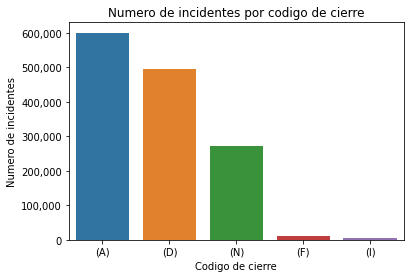

In [50]:
a = sns.countplot(x="codigo_cierre_",
                  data=c5,
                  #hue='codigo_cierre',
                  order = c5['codigo_cierre_'].value_counts().index)
plt.title('Numero de incidentes por codigo de cierre')
plt.xlabel('Codigo de cierre')
plt.ylabel('Numero de incidentes')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
a.yaxis.set_major_formatter(tick) 
plt.show()

Adicionalmente, desde el 2014 los incidentes reportados se acumulan en las categorias A y D; entre 78 y 81 por ciento. Mientras que la siguiente categoría con mas incidencia es la referente a atención despachada pero en el lugar nadie habia solicitado el servicio.

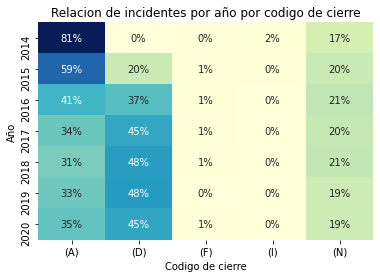

In [51]:
b = sns.heatmap(pd.crosstab(c5['año_cierre'],c5['codigo_cierre_'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relacion de incidentes por año por codigo de cierre')
plt.xlabel('Codigo de cierre')
plt.ylabel('Año')
#b.set(xticklabels=[])
plt.show()

Para enfocar el analisis consideraremos los codigos de atencion despachada pero nadie en el lugar nadie habia solictado el servicio (N) y emergencia falsa (F) como incidentes falsos (1), mientras que las demas claves serán considerados incidentes verdaderos (0).

Ochenta por ciento de los casos se consideran como incidentes verdaderos mientras que veinte por cierto son falsos.

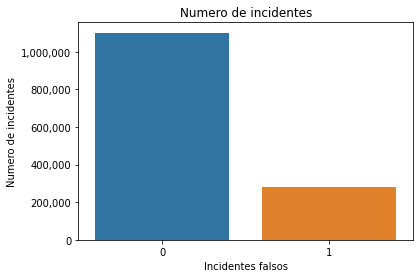

In [52]:
c = sns.countplot(x="incidente_falso",data=c5)
plt.title('Numero de incidentes')
plt.xlabel('Incidentes falsos')
plt.ylabel('Numero de incidentes')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
c.yaxis.set_major_formatter(tick) 
plt.show()

Del año 2017 al 2018 se nota un incremento en el numero de incidentes reportados; sin embargo, en 2019 bajo esa cifra. Se nota el mismo compartamiento para incidentes catalogados como falsos.

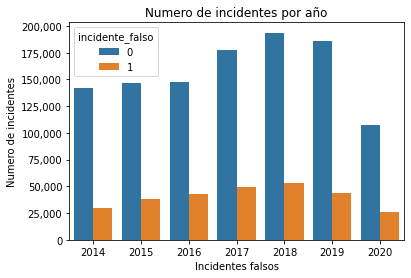

In [53]:
d = sns.countplot(x="año_cierre",hue='incidente_falso',data=c5)
plt.title('Numero de incidentes por año')
plt.xlabel('Incidentes falsos')
plt.ylabel('Numero de incidentes')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
d.yaxis.set_major_formatter(tick) 
plt.show()

El reporte de incidentes viales que son verdaderos se encuentra entre 79% y 83% del 2014 al 2020, mostrando una mejora en el compartamiento desde el 2018 en adelante.

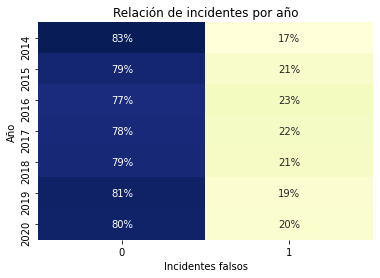

In [54]:
e = sns.heatmap(pd.crosstab(c5['año_cierre'],c5['incidente_falso'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relación de incidentes por año')
plt.xlabel('Incidentes falsos')
plt.ylabel('Año')
#b.set(xticklabels=[])
plt.show()

Una vez que verificamos que entre diferentes años el comportamiento es estable, toca profundizar en periodos mas cortos ; es decir, entre los meses del año.

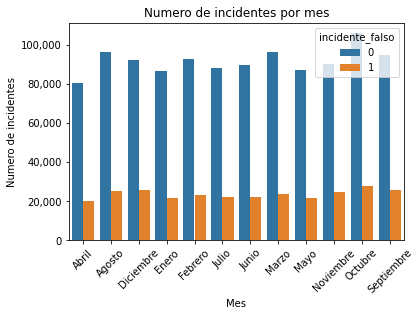

In [55]:
f = sns.countplot(x="mes_cierre",hue='incidente_falso',data=c5)
plt.title('Numero de incidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Numero de incidentes')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
f.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)
plt.show()

Nuevamente se refleja un comportamiento estable entre todos los meses del año; existiendo únicamente una diferencia de 2% entre consultas en diferentes meses.

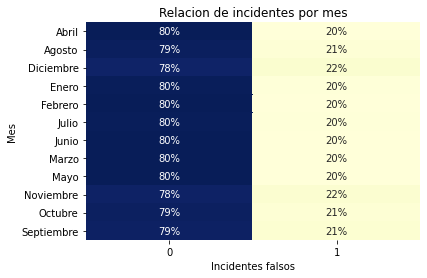

In [56]:
g = sns.heatmap(pd.crosstab(c5['mes_cierre'],c5['incidente_falso'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relacion de incidentes por mes')
plt.xlabel('Incidentes falsos')
plt.ylabel('Mes')
#b.set(xticklabels=[])
plt.show()

In [57]:
#pd.crosstab(c5['incidente_c4'],c5['incidente_falso'],dropna=False,normalize='index')

Si consideramos el tipo de incidente c4 para cotejar si es un incidente falso o verdadero, podemos observar que "mi ciudad-calle-incidente de tránsito" y "mi ciudad-taxi-incidente de tránsito" presentan la relación más alta respecto a un incidente falso. 

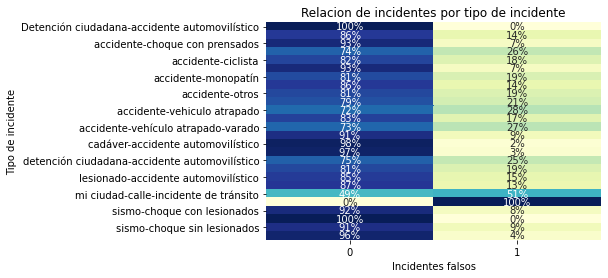

In [58]:
h = sns.heatmap(pd.crosstab(c5['incidente_c4'],c5['incidente_falso'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relacion de incidentes por tipo de incidente')
plt.xlabel('Incidentes falsos')
plt.ylabel('Tipo de incidente')
#b.set(xticklabels=[])
plt.show()

La manera en que se recibe el llamdo de ayuda también es un factor importante a considerar. Cuando se reporta a traves de Aplicativos y Redes es mucho mas probable que sea falso a diferencia de los otros tipos (37% y 40% de casos falsos). Por otra parte, reportes a través de camara o radio tiene una certeza  de incidentes veraderos mayor al 96%.

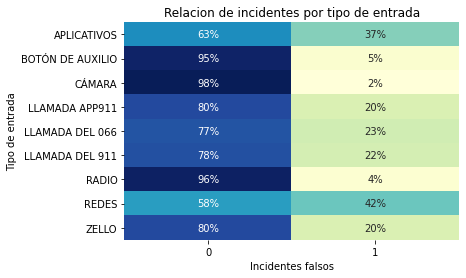

In [59]:
i = sns.heatmap(pd.crosstab(c5['tipo_entrada'],c5['incidente_falso'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relacion de incidentes por tipo de entrada')
plt.xlabel('Incidentes falsos')
plt.ylabel('Tipo de entrada')
#b.set(xticklabels=[])
plt.show()

Es importante agregar que se verificó si la delegacion donde se abre el reporte era el mismo que donde se cerraba. El hallazgo es que en general, la delegacion donde se aperturaba la solicitud es donde se cerraba. Delegaciones como Gustavo A. Madero y Milpa Alta abren y cierran el reporte en esa misma delegación en el 99% de los casos, mientras que Iztacalco y Xochimilco lo realizan de esa menra a niveles menores del 94%.

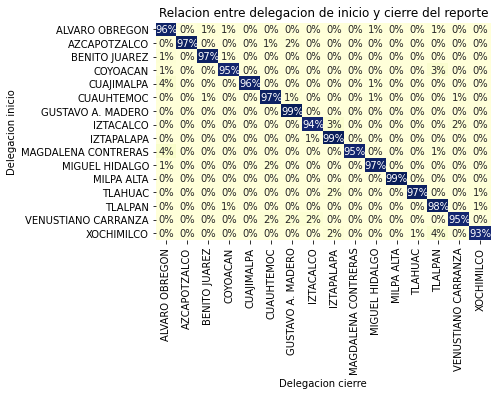

In [60]:
j = sns.heatmap(pd.crosstab(c5['delegacion_inicio'],c5['delegacion_cierre'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relacion entre delegacion de inicio y cierre del reporte')
plt.xlabel('Delegacion cierre')
plt.ylabel('Delegacion inicio')
#b.set(xticklabels=[])
plt.show()

Dentro de cada delegacion, el porcentaje de incidentes verdaderos y falsos varia significamente a diferencia de la vision anual y por mes. Donde Cuajimalpa y Magdalena contreras muestran el porcentaje mas alto de incidentes falsos y el menor es de Azcapotzalco y Cuauhtmeoc.

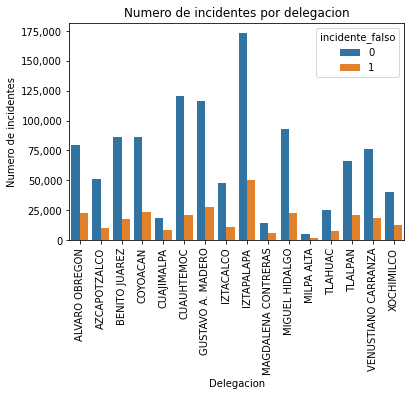

In [66]:
k = sns.countplot(x='delegacion_inicio',hue="incidente_falso",data=c5)
plt.title('Numero de incidentes por delegacion')
plt.xlabel('Delegacion')
plt.ylabel('Numero de incidentes')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
k.yaxis.set_major_formatter(tick)
plt.xticks(rotation=90)
plt.show()

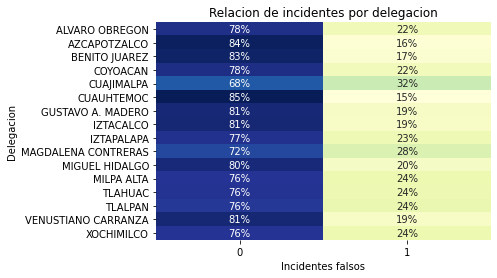

In [62]:
l = sns.heatmap(pd.crosstab(c5['delegacion_inicio'],c5['incidente_falso'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relacion de incidentes por delegacion')
plt.xlabel('Incidentes falsos')
plt.ylabel('Delegacion')
#b.set(xticklabels=[])
plt.show()

En la visión semanal, se registran mas incidentes los dias viernes y sabado pero el porcentaje de falsos se mantiene estable, teniendo al viernes como el dia con mas falsos. 

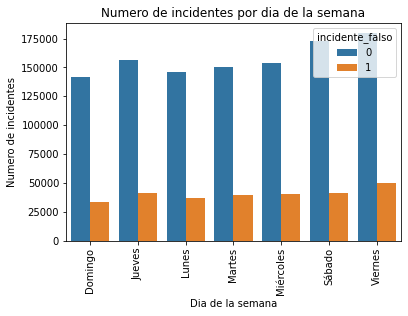

In [63]:
m = sns.countplot(x="dia_semana",hue='incidente_falso',data=c5)
plt.title('Numero de incidentes por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Numero de incidentes')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
k.yaxis.set_major_formatter(tick)
plt.xticks(rotation=90)
plt.show()

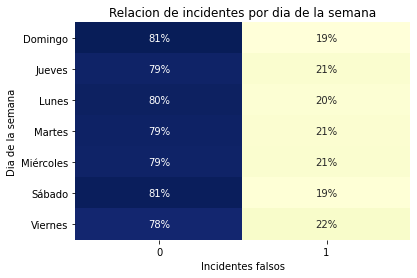

In [64]:
n = sns.heatmap(pd.crosstab(c5['dia_semana'],c5['incidente_falso'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False,
            fmt=".0%")
plt.title('Relacion de incidentes por dia de la semana')
plt.xlabel('Incidentes falsos')
plt.ylabel('Dia de la semana')
#b.set(xticklabels=[])
plt.show()

Podemos notar en el siguiente mapa de la ciudad de Mexico con color azul los reportes verdaderos y los rojos los falsos. En la zona del Oeste y Sur se muestra una concentración importante de casos falsos.

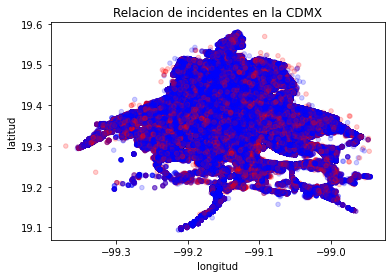

In [67]:
c5.plot(kind="scatter",x='longitud',y='latitud',c='incidente_falso_color',
        alpha=0.2)
plt.title('Relacion de incidentes en la CDMX')
plt.show()